# Computational Intelligence
## Assignment - 2

##### Github link : https://github.com/syedjameel/CI-2.git
written by : Jameel Ahmed Syed
email : j.syed@innopolis.university

# Task

<hr>


```
Contents
0. Problem Formulation
1. Task 1
2. Task 2
3. Task 3
4. Task 4
5. Task 5
```

<hr>

## 0. Problem formulation

Assume that you have a walking robot standing on 4 feet. We model the robot as a point-mass with four reaction forces acting on it:

$$
\left\{\begin{array}{l}
m \ddot{\mathbf{r}}_{c}=\mathbf{f}_{1}+\mathbf{f}_{2}+\mathbf{f}_{3}+\mathbf{f}_{4}+m \mathbf{g} \\
0=\sum_{i=1}^{4}\left(\mathbf{r}_{i}-\mathbf{r}_{C}\right) \times \mathbf{f}_{i}
\end{array}\right.
$$

where $\mathbf{r}_{C} \in \mathbb{R}^{3}$ is the position of the center of mass of the robot, $\mathbf{f}_{i} \in \mathbb{R}^{3}$ are the reaction forces, $\mathbf{r}_{i} \in \mathbb{R}^{3}$ are position of the feet, $m$ is the mass of the robot, and $\mathbf{g}=\left[\begin{array}{c}0 \\ 0 \\ -9.8\end{array}\right]$ is gravitational vector.

We additionally assume that the reaction forces lie in the friction cone, with friction coefficient $\mu$.

<hr>

## Task-1

### 1. Given $\mathbf{r}_{C}$, and $\mathbf{r}_{i}$ find if there exit reaction forces that allow the robot to maintain static stability (1) with $\ddot{\mathbf{r}}_{c}=0$, given that the robot stands on horizontal ground.

if $\ddot{\mathbf{r}}_{c}=0$ we get the following:

$$
\left\{\begin{array}{l}
0=\mathbf{f}_{1}+\mathbf{f}_{2}+\mathbf{f}_{3}+\mathbf{f}_{4}+m \mathbf{g} \\
0=\sum_{i=1}^{4}\left(\mathbf{r}_{i}-\mathbf{r}_{C}\right) \times \mathbf{f}_{i}
\end{array}\right.
$$

for the Cross Product we can use the skew symmetric matrix as follows:
\begin{equation}
\begin{bmatrix}
\mathbf{a}
\end{bmatrix}
=
\begin{bmatrix}
0 & -\mathbf{a_3} & \mathbf{a_2} \\
\mathbf{a_3} & 0 & -\mathbf{a_1} \\
-\mathbf{a_2} & \mathbf{a_1} & 0 \\
\end{bmatrix}
\end{equation}

We also know the constraint of friction:  $\left\|\mathbf{E}_{t}^{\top} \mathbf{f}_{i}\right\| \leq \mu \mathbf{e}_{n}^{\top} \mathbf{f}_{i}$
where $\mathbf{E}_{t}$ is orthonormal basis in the tangential space to the surface; and $\mathbf{e}_{n}$ is the normal vector of the surface.

In [56]:
# Import all the libraries
import cvxpy as cp
from scipy.linalg import null_space
import numpy as np
import random
from matplotlib import pyplot as plt
import math

# Length and width of the robot
L = 50
W = 30

# our normal vector to the xy plane
normal_vector = np.array([[0], [0], [1]])

# we take left null space to get the plane orthogonal to the normal vector
plane = null_space(normal_vector.T)
print("Left null space of normal vector ", normal_vector.ravel(), "\n is the span of the plane normal to the normal vector \n", plane)

Left null space of normal vector  [0 0 1] 
 is the span of the plane normal to the normal vector 
 [[ 0. -1.]
 [ 1.  0.]
 [ 0.  0.]]


In [57]:
def generate_random_points(x0, y0, r):
    """To generate random points in a circle of radius r with center x0, y0
    :param x0, y0: Center of the circle
    :param r: Radius of the circle"""
    # Generate a random angle between 0 and 2*pi radians
    theta = random.uniform(0, 2*math.pi)
    # Calculate the coordinates of a point on the circle
    x = x0 + r*math.cos(theta)
    y = y0 + r*math.sin(theta)
    return [x, y]

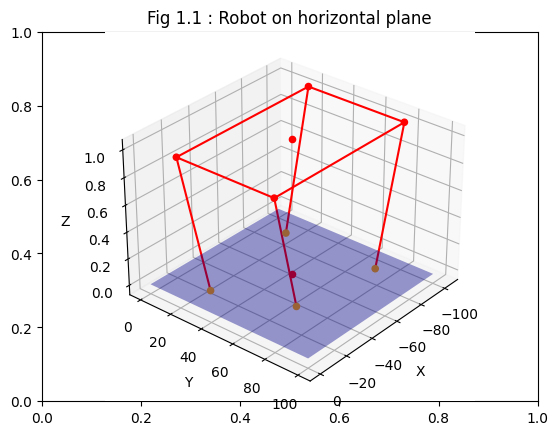

In [58]:

# Generate random 2d points for four legs of the robot
r2d = np.array([generate_random_points(25, 25, 10),
                 generate_random_points(75, 75, 10),
                 generate_random_points(25, 75, 10),
                 generate_random_points(75, 25, 10)])


# Generate the centre of those random points as rc (centre of the robot)
rc_2d = np.array([np.average(r2d[:,0]), np.average(r2d[:,1])])

# Position of legs of the robot
r = r2d[:, 0].reshape(4, 1) * plane[:, 0] + r2d[:, 1].reshape(4, 1) * plane[:, 1]

# Position of the centre of the chassis of the robot
rc = rc_2d[0] * plane[:, 0] + rc_2d[1] * plane[:, 1] + 1*normal_vector.ravel()

# Plot the plain, legs, and chassis of the robot
fig = plt.figure()
plt.title('Fig 1.1 : Robot on horizontal plane')
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[0:100:2j, 0:100:2j]
x = 0 + u*plane[0, 0] + v*plane[0, 1]
y = 0 + u*plane[1, 0] + v*plane[1, 1]
z = 0 + u*plane[2, 0] + v*plane[2, 1]

# Plot the robots points of contact on the ground
ax.scatter(r[:, 0], r[:, 1], r[:, 2], color='orange', alpha=1)

# Plot the chassis points
dim = np.array([[rc[0] + L, rc[1] - W, rc[2]],
                [rc[0] - L, rc[1] + W, rc[2]],
                [rc[0] - L, rc[1] - W, rc[2]],
                [rc[0] + L, rc[1] + W, rc[2]]])
ax.scatter(dim[:, 0], dim[:, 1], dim[:, 2], color="red", alpha=1)

# Draw the legs
for i in range(4):
    ax.plot([r[i,0], dim[i,0]], [r[i,1], dim[i, 1]], [r[i, 2], dim[i, 2]], color='red')


# Draw the boundaries of the robot chassis
ax.plot([dim[0, 0], dim[2, 0]], [dim[0, 1], dim[2, 1]], [dim[0, 2], dim[2, 2]], color='red')
ax.plot([dim[1, 0], dim[2, 0]], [dim[1, 1], dim[2, 1]], [dim[1, 2], dim[2, 2]], color='red')
ax.plot([dim[1, 0], dim[3, 0]], [dim[1, 1], dim[3, 1]], [dim[1, 2], dim[3, 2]], color='red')
ax.plot([dim[0, 0], dim[3, 0]], [dim[0, 1], dim[3, 1]], [dim[0, 2], dim[3, 2]], color='red')


# Plot the projection of rc (center) point of the robot on the ground
v = rc
dist = v@normal_vector
rc_proj = v - dist*normal_vector.ravel()
ax.scatter(rc_proj[0], rc_proj[1], 0, color='red')
ax.scatter(rc[0], rc[1], rc[2], color='red')

# Plot the surface of the Plane on which the robot is standing
ax.plot_surface(x, y, z, color='blue', alpha=0.4)

# Set up the labels and view angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(30, 40)
plt.show()


In [59]:

# Declare the variables and constants
f1 = cp.Variable((3, 1))
f2 = cp.Variable((3, 1))
f3 = cp.Variable((3, 1))
f4 = cp.Variable((3, 1))

m = 10  # Mass of the robot in Kg
meu = 0.9   # Friction coefficient
mg = m*np.array([0, 0, -9.81]).reshape(3, 1)    # mg

skew_symm_matrix = lambda a: np.array([[0, -a[2], a[1]],
                                       [a[2], 0, -a[0]],
                                       [-a[1], a[0], 0]])

objective = cp.Minimize(0)
constraints = [f1 + f2 + f3 + f4 + mg == 0,
               skew_symm_matrix(r[0]-rc) @ f1 +
               skew_symm_matrix(r[1]-rc) @ f2 +
               skew_symm_matrix(r[2]-rc) @ f3 +
               skew_symm_matrix(r[3]-rc) @ f4 == 0,
               cp.norm2(plane.T @ f1) <= meu * normal_vector.T @ f1,
               cp.norm2(plane.T @ f2) <= meu * normal_vector.T @ f2,
               cp.norm2(plane.T @ f3) <= meu * normal_vector.T @ f3,
               cp.norm2(plane.T @ f4) <= meu * normal_vector.T @ f4]

cp.Problem(objective, constraints).solve()
if f1.value is not None:
    print("The Robot is stable, the forces are:")
    print("f1 = ", f1.value.ravel())
    print("f2 = ", f2.value.ravel())
    print("f3 = ", f3.value.ravel())
    print("f4 = ", f4.value.ravel())
    print("at friction coeff = ", meu)
else:
    print("Robot is unstable")
    print("at friction coeff = ", meu)

The Robot is stable, the forces are:
f1 =  [-1.22420125e-13 -8.98038336e-14  2.40609066e+01]
f2 =  [-9.54198612e-14 -7.54901746e-14  2.40725415e+01]
f3 =  [1.34699639e-13 9.32508723e-14 2.48465608e+01]
f4 =  [8.31403466e-14 7.20431359e-14 2.51199911e+01]
at friction coeff =  0.9


<hr>

## Task-2

### 2. Solve the previous problem, but assume that the robot stands on tilted ground.

Here we only need to update the normal vector and corresponding span of the plane orthogonal to the normal vector and that's it! Other things remain same.

In [60]:
# tilting the normal vector randomly
n2 = normal_vector.ravel() + np.array([random.sample(range(0, 3), 3)]).ravel()

In [61]:
n2 = n2.reshape(3, 1)

In [62]:
print("The normal vector after the random tilt = ", n2.ravel())

The normal vector after the random tilt =  [0 1 3]


In [63]:
# Generating the span of plane orthogonal to the vector normal to it using left null space
tilt_plane = null_space(n2.T)

In [64]:
print("Span of the plane orthogonal to the normal vector ", n2.ravel(), "\n is \n", tilt_plane)

Span of the plane orthogonal to the normal vector  [0 1 3] 
 is 
 [[-0.31622777 -0.9486833 ]
 [ 0.9        -0.3       ]
 [-0.3         0.1       ]]


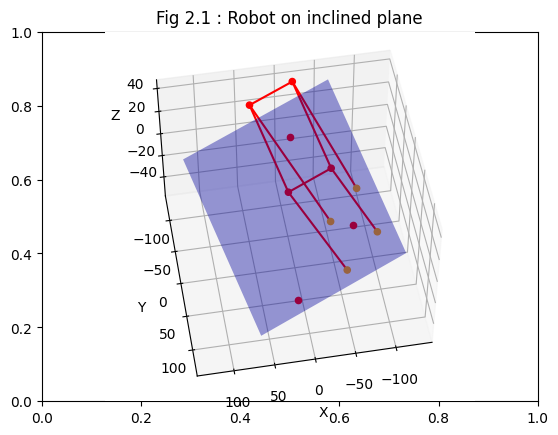

In [65]:
r2d = np.array([generate_random_points(25, 25, 10),
                 generate_random_points(75, 75, 10),
                 generate_random_points(25, 75, 10),
                 generate_random_points(75, 25, 10)])


rc_2d = np.array([np.average(r2d[:,0]), np.average(r2d[:,1])])

r = r2d[:, 0].reshape(4, 1) * tilt_plane[:, 0] + r2d[:, 1].reshape(4, 1) * tilt_plane[:, 1]
rc = rc_2d[0] * tilt_plane[:, 0] + rc_2d[1] * tilt_plane[:, 1] + 1*n2.ravel()


fig = plt.figure()
plt.title('Fig 2.1 : Robot on inclined plane')
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[-100:100:2j, -100:100:2j]
x = 0 + u*tilt_plane[0, 0] + v*tilt_plane[0, 1]
y = 0 + u*tilt_plane[1, 0] + v*tilt_plane[1, 1]
z = 0 + u*tilt_plane[2, 0] + v*tilt_plane[2, 1]

ax.scatter(r[:, 0], r[:, 1], r[:, 2], color='orange', alpha=1)


# Length and width of the robot
L = 50
W = 30

# Plot the leg positions
dim = np.array([[rc[0] + L, rc[1] - W*np.sin(30), rc[2]],
                [rc[0] - L, rc[1] + W*np.sin(30), rc[2]],
                [rc[0] - L, rc[1] - W*np.sin(30), rc[2]],
                [rc[0] + L, rc[1] + W*np.sin(30), rc[2]]])

dim1 = dim[:, 0].reshape(4, 1)*tilt_plane[:, 0] + dim[:, 1].reshape(4, 1)* tilt_plane[:, 1] + dim[:, 2].reshape(4, 1)*n2.ravel()/100
ax.scatter(dim1[:, 0], dim1[:, 1], dim1[:, 2], color="red", alpha=1)

# Tilted centre of robot chassis
trc = np.array([np.average(dim1[:, 0]), np.average(dim1[:, 1]), np.average(dim1[:, 2])])
ax.scatter(trc[0], trc[1], trc[2], color='red')

# Draw the legs
ax.plot([r[0,0], dim1[1,0]], [r[0,1], dim1[1, 1]], [r[0, 2], dim1[1, 2]], color='red')
ax.plot([r[2,0], dim1[2,0]], [r[2,1], dim1[2, 1]], [r[2, 2], dim1[2, 2]], color='red')
ax.plot([r[3,0], dim1[3,0]], [r[3,1], dim1[3, 1]], [r[3, 2], dim1[3, 2]], color='red')
ax.plot([r[1,0], dim1[0,0]], [r[1,1], dim1[0, 1]], [r[1, 2], dim1[0, 2]], color='red')


# Draw the boundaries of the robot chassis
ax.plot([dim1[0, 0], dim1[2, 0]], [dim1[0, 1], dim1[2, 1]], [dim1[0, 2], dim1[2, 2]], color='red')
ax.plot([dim1[1, 0], dim1[2, 0]], [dim1[1, 1], dim1[2, 1]], [dim1[1, 2], dim1[2, 2]], color='red')
ax.plot([dim1[1, 0], dim1[3, 0]], [dim1[1, 1], dim1[3, 1]], [dim1[1, 2], dim1[3, 2]], color='red')
ax.plot([dim1[0, 0], dim1[3, 0]], [dim1[0, 1], dim1[3, 1]], [dim1[0, 2], dim1[3, 2]], color='red')


# Plot the projection of rc (center) point of the robot on the ground
v = n2.ravel() - trc
dist = v@n2.ravel()
rc_proj = (v - dist*n2.ravel())

ax.scatter(rc_proj[0], rc_proj[1], rc_proj[2], color='red')
ax.scatter(rc[0], rc[1], rc[2], color='red')


# Plot the surface of the Plane on which the robot is standing
ax.plot_surface(x, y, z, color='blue', alpha=0.4)

# Setup the labels and view angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(50, 80)
plt.show()

In [66]:

# Declare the variables and constants
f1 = cp.Variable((3, 1))
f2 = cp.Variable((3, 1))
f3 = cp.Variable((3, 1))
f4 = cp.Variable((3, 1))

m = 10  # Mass of the robot in Kg
meu = 0.8   # Friction coefficient
mg = m*np.array([0, 0, -9.81]).reshape(3, 1)    # mg

# Skew symmetric matrix for computing cross product
skew_symm_matrix = lambda a: np.array([[0, -a[2], a[1]],
                                       [a[2], 0, -a[0]],
                                       [-a[1], a[0], 0]])

# run the problem with all the constraints
obj = cp.Minimize(0)
constraints = [f1 + f2 + f3 + f4 + mg == 0,
               skew_symm_matrix(r[0]-rc) @ f1 +
               skew_symm_matrix(r[1]-rc) @ f2 +
               skew_symm_matrix(r[2]-rc) @ f3 +
               skew_symm_matrix(r[3]-rc) @ f4 == 0,
               cp.norm2(tilt_plane.T @ f1) <= meu * n2.T @ f1,
               cp.norm2(tilt_plane.T @ f2) <= meu * n2.T @ f2,
               cp.norm2(tilt_plane.T @ f3) <= meu * n2.T @ f3,
               cp.norm2(tilt_plane.T @ f4) <= meu * n2.T @ f4]

cp.Problem(obj, constraints).solve()
if f1.value is not None:
    print("The Robot is stable, the forces are:")
    print("f1 = ", f1.value.ravel())
    print("f2 = ", f2.value.ravel())
    print("f3 = ", f3.value.ravel())
    print("f4 = ", f4.value.ravel())
    print("at friction coeff = ", meu)
else:
    print("Robot is unstable")
    print("at friction coeff = ", meu)

The Robot is stable, the forces are:
f1 =  [-0.06942316 -0.07835268 25.40363816]
f2 =  [ 0.06644599 -0.38630799 26.41014317]
f3 =  [-0.27580342 -0.25854565 22.07255652]
f4 =  [ 0.27878059  0.72320631 24.21366215]
at friction coeff =  0.8


<hr>

## Task-3

### 3. Solve the previous problem, but assume that one of the feet pushes against a vertical wall instead of standing on the ground.

Now one of the leg of the robot is resting on the wall and other three are resting on the inclined plane. So we use the inclined plane for the 3 legs and wall plane for the one leg which is on the wall. Hence all remains same except the respective planes (Orthonormal basis) and respective normal vectors.

In [67]:
# wall's normal vector randomly
n3 = np.array([1, 0, 0]).reshape(3, 1)
print("The normal vector of the wall = ", n3.ravel())

The normal vector of the wall =  [1 0 0]


In [68]:
# Generating the span of plane orthogonal to the vector normal to it using left null space
wall_plane = null_space(n3.T)
print("Span of the plane orthogonal to the normal vector ", n3.ravel(), "\n is \n", wall_plane)

Span of the plane orthogonal to the normal vector  [1 0 0] 
 is 
 [[0. 0.]
 [1. 0.]
 [0. 1.]]


In [69]:
n3.shape

(3, 1)

In [70]:
wall_plane.shape

(3, 2)

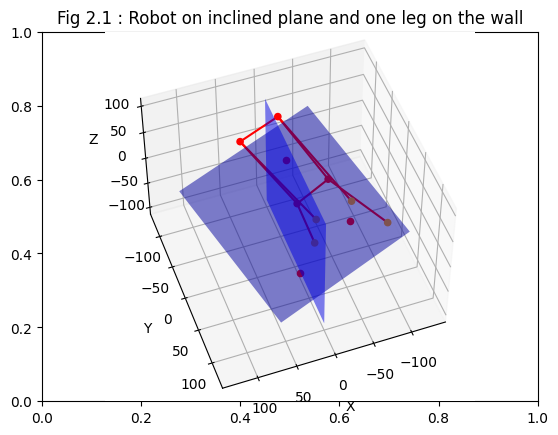

In [71]:
r2d = np.array([generate_random_points(25, 25, 10),
                 generate_random_points(75, 75, 10),
                 generate_random_points(25, 75, 10),
                 generate_random_points(75, 25, 10)])


#rc_2d= np.array(random.sample(range(30, 60), 2))
rc_2d = np.array([np.average(r2d[:,0]), np.average(r2d[:,1])])

r_ground = r2d[:3, 0].reshape(3, 1) * tilt_plane[:, 0] + r2d[:3, 1].reshape(3, 1) * tilt_plane[:, 1]
r_wall = r2d[3, 0].reshape(1, 1) * wall_plane[:, 0] + r2d[3, 1].reshape(1, 1) * wall_plane[:, 1]
r = np.concatenate([r_ground, r_wall])
rc = rc_2d[0] * tilt_plane[:, 0] + rc_2d[1] * tilt_plane[:, 1] + 1*n2.ravel()


fig = plt.figure()
plt.title('Fig 2.1 : Robot on inclined plane and one leg on the wall')
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[-100:100:2j, -100:100:2j]
x = 0 + u*wall_plane[0, 0] + v*wall_plane[0, 1]
y = 0 + u*wall_plane[1, 0] + v*wall_plane[1, 1]
z = 0 + u*wall_plane[2, 0] + v*wall_plane[2, 1]

# Plot the surface of the Plane of the wall
ax.plot_surface(x, y, z, color='blue', alpha=0.5)

u, v = np.mgrid[-100:100:2j, -100:100:2j]
x = 0 + u*tilt_plane[0, 0] + v*tilt_plane[0, 1]
y = 0 + u*tilt_plane[1, 0] + v*tilt_plane[1, 1]
z = 0 + u*tilt_plane[2, 0] + v*tilt_plane[2, 1]

# Plot the surface of the Plane on which the robot is standing
ax.plot_surface(x, y, z, color='blue', alpha=0.5)

# Plot the contact points of the feets of the robot
ax.scatter(r[:, 0], r[:, 1], r[:, 2], color='orange', alpha=1)


# Length and width of the robot
L = 50
W = 30

# Plot the leg positions
dim = np.array([[rc[0] + L, rc[1] - W*np.sin(30), rc[2]],
                [rc[0] - L, rc[1] + W*np.sin(30), rc[2]],
                [rc[0] - L, rc[1] - W*np.sin(30), rc[2]],
                [rc[0] + L, rc[1] + W*np.sin(30), rc[2]]])

dima = dim[:3, 0].reshape(3, 1)*tilt_plane[:, 0] + dim[:3, 1].reshape(3, 1)* tilt_plane[:, 1] + dim[:3, 2].reshape(3, 1)*n2.ravel()/100

dimb = dim[3, 0].reshape(1, 1)*wall_plane[:, 0] + dim[3, 1].reshape(1, 1)* wall_plane[:, 1] + dim[3, 2].reshape(1, 1)*n3.ravel()
dim1 = np.concatenate([dima, dimb])
ax.scatter(dim1[:, 0], dim1[:, 1], dim1[:, 2], color="red", alpha=1)

# Tilted centre of robot chassis
trc = np.array([np.average(dim1[:, 0]), np.average(dim1[:, 1]), np.average(dim1[:, 2])])
ax.scatter(trc[0], trc[1], trc[2], color='red')

# Draw the legs
ax.plot([r[0,0], dim1[1,0]], [r[0,1], dim1[1, 1]], [r[0, 2], dim1[1, 2]], color='red')
ax.plot([r[2,0], dim1[2,0]], [r[2,1], dim1[2, 1]], [r[2, 2], dim1[2, 2]], color='red')
ax.plot([r[3,0], dim1[3,0]], [r[3,1], dim1[3, 1]], [r[3, 2], dim1[3, 2]], color='red')
ax.plot([r[1,0], dim1[0,0]], [r[1,1], dim1[0, 1]], [r[1, 2], dim1[0, 2]], color='red')


# Draw the boundaries of the robot chassis
ax.plot([dim1[0, 0], dim1[2, 0]], [dim1[0, 1], dim1[2, 1]], [dim1[0, 2], dim1[2, 2]], color='red')
ax.plot([dim1[1, 0], dim1[2, 0]], [dim1[1, 1], dim1[2, 1]], [dim1[1, 2], dim1[2, 2]], color='red')
ax.plot([dim1[1, 0], dim1[3, 0]], [dim1[1, 1], dim1[3, 1]], [dim1[1, 2], dim1[3, 2]], color='red')
ax.plot([dim1[0, 0], dim1[3, 0]], [dim1[0, 1], dim1[3, 1]], [dim1[0, 2], dim1[3, 2]], color='red')


# Plot the projection of rc (center) point of the robot on the ground
v = n2.ravel() - trc
dist = v@n2.ravel()
rc_proj = (v - dist*n2.ravel())

ax.scatter(rc_proj[0], rc_proj[1], rc_proj[2], color='red')
ax.scatter(rc[0], rc[1], rc[2], color='red')



# Setup the labels and view angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(50, 70)
plt.show()

In [72]:
# Declare the variables and constants
f1 = cp.Variable((3, 1))
f2 = cp.Variable((3, 1))
f3 = cp.Variable((3, 1))
f4 = cp.Variable((3, 1))

m = 10  # Mass of the robot in Kg
meu = 0.8   # Friction coefficient
mg = m*np.array([0, 0, -9.81]).reshape(3, 1)    # mg

# Skew symmetric matrix for computing cross product
skew_symm_matrix = lambda a: np.array([[0, -a[2], a[1]],
                                       [a[2], 0, -a[0]],
                                       [-a[1], a[0], 0]])

# run the problem with all the constraints
obj = cp.Minimize(0)
constraints = [f1 + f2 + f3 + f4 + mg == 0,
               skew_symm_matrix(r[0]-rc) @ f1 +
               skew_symm_matrix(r[1]-rc) @ f2 +
               skew_symm_matrix(r[2]-rc) @ f3 +
               skew_symm_matrix(r[3]-rc) @ f4 == 0,
               cp.norm2(tilt_plane.T @ f1) <= meu * n2.T @ f1,
               cp.norm2(tilt_plane.T @ f2) <= meu * n2.T @ f2,
               cp.norm2(tilt_plane.T @ f3) <= meu * n2.T @ f3,
               cp.norm2(wall_plane.T @ f4) <= meu * n3.T @ f4]

cp.Problem(obj, constraints).solve()
if f1.value is not None:
    print("The Robot is stable, the forces are:")
    print("f1 = ", f1.value.ravel())
    print("f2 = ", f2.value.ravel())
    print("f3 = ", f3.value.ravel())
    print("f4 = ", f4.value.ravel())
    print("at friction coeff = ", meu)
else:
    print("Robot is unstable")
    print("at friction coeff = ", meu)

The Robot is stable, the forces are:
f1 =  [-23.27283694  18.16131658  32.43341898]
f2 =  [-15.39813343 -16.05054111  25.68069079]
f3 =  [-2.50678049 -5.39964503 17.54221088]
f4 =  [41.17775086  3.28886956 22.44367935]
at friction coeff =  0.8


<hr>

## Task-4

### 4. Solve the previous problem, but assume that one of the feet is nailed to the floor.

Here our problem is all the same but we will have one of our legs of the robot fixed on the ground,
in the sense that it doesnt play a role but inreal life this should be considered as well because it will effect the robots forces on other legs.

But for now we are going to remove the friction equation of the 1st leg from our constraints, considering it is fixed on the ground.

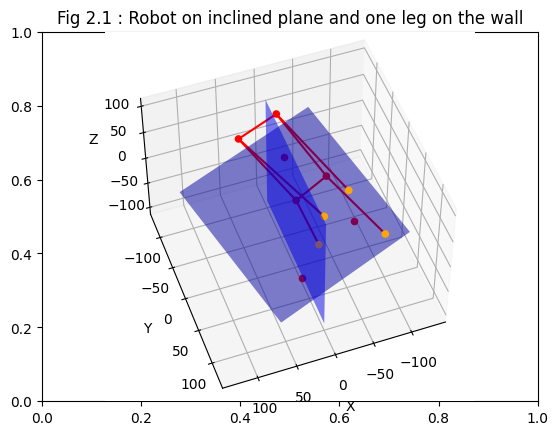

In [73]:
r2d = np.array([generate_random_points(25, 25, 1),
                 generate_random_points(75, 75, 10),
                 generate_random_points(25, 75, 10),
                 generate_random_points(75, 25, 10)])


#rc_2d= np.array(random.sample(range(30, 60), 2))
rc_2d = np.array([np.average(r2d[:,0]), np.average(r2d[:,1])])

r_ground = r2d[:3, 0].reshape(3, 1) * tilt_plane[:, 0] + r2d[:3, 1].reshape(3, 1) * tilt_plane[:, 1]
r_wall = r2d[3, 0].reshape(1, 1) * wall_plane[:, 0] + r2d[3, 1].reshape(1, 1) * wall_plane[:, 1]
r = np.concatenate([r_ground, r_wall])
rc = rc_2d[0] * tilt_plane[:, 0] + rc_2d[1] * tilt_plane[:, 1] + 1*n2.ravel()


fig = plt.figure()
plt.title('Fig 2.1 : Robot on inclined plane and one leg on the wall')
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[-100:100:2j, -100:100:2j]
x = 0 + u*wall_plane[0, 0] + v*wall_plane[0, 1]
y = 0 + u*wall_plane[1, 0] + v*wall_plane[1, 1]
z = 0 + u*wall_plane[2, 0] + v*wall_plane[2, 1]

# Plot the surface of the Plane of the wall
ax.plot_surface(x, y, z, color='blue', alpha=0.5)

u, v = np.mgrid[-100:100:2j, -100:100:2j]
x = 0 + u*tilt_plane[0, 0] + v*tilt_plane[0, 1]
y = 0 + u*tilt_plane[1, 0] + v*tilt_plane[1, 1]
z = 0 + u*tilt_plane[2, 0] + v*tilt_plane[2, 1]

# Plot the surface of the Plane on which the robot is standing
ax.plot_surface(x, y, z, color='blue', alpha=0.5)

# Plot the contact points of the feets of the robot
ax.scatter(r[:, 0], r[:, 1], r[:, 2], color='orange', alpha=1)


# Length and width of the robot
L = 50
W = 30

# Plot the leg positions
dim = np.array([[rc[0] + L, rc[1] - W*np.sin(30), rc[2]],
                [rc[0] - L, rc[1] + W*np.sin(30), rc[2]],
                [rc[0] - L, rc[1] - W*np.sin(30), rc[2]],
                [rc[0] + L, rc[1] + W*np.sin(30), rc[2]]])

dima = dim[:3, 0].reshape(3, 1)*tilt_plane[:, 0] + dim[:3, 1].reshape(3, 1)* tilt_plane[:, 1] + dim[:3, 2].reshape(3, 1)*n2.ravel()/100

dimb = dim[3, 0].reshape(1, 1)*wall_plane[:, 0] + dim[3, 1].reshape(1, 1)* wall_plane[:, 1] + dim[3, 2].reshape(1, 1)*n3.ravel()
dim1 = np.concatenate([dima, dimb])
ax.scatter(dim1[:, 0], dim1[:, 1], dim1[:, 2], color="red", alpha=1)

# Tilted centre of robot chassis
trc = np.array([np.average(dim1[:, 0]), np.average(dim1[:, 1]), np.average(dim1[:, 2])])
ax.scatter(trc[0], trc[1], trc[2], color='red')

# Draw the legs
ax.plot([r[0,0], dim1[1,0]], [r[0,1], dim1[1, 1]], [r[0, 2], dim1[1, 2]], color='red')
ax.plot([r[2,0], dim1[2,0]], [r[2,1], dim1[2, 1]], [r[2, 2], dim1[2, 2]], color='red')
ax.plot([r[3,0], dim1[3,0]], [r[3,1], dim1[3, 1]], [r[3, 2], dim1[3, 2]], color='red')
ax.plot([r[1,0], dim1[0,0]], [r[1,1], dim1[0, 1]], [r[1, 2], dim1[0, 2]], color='red')


# Draw the boundaries of the robot chassis
ax.plot([dim1[0, 0], dim1[2, 0]], [dim1[0, 1], dim1[2, 1]], [dim1[0, 2], dim1[2, 2]], color='red')
ax.plot([dim1[1, 0], dim1[2, 0]], [dim1[1, 1], dim1[2, 1]], [dim1[1, 2], dim1[2, 2]], color='red')
ax.plot([dim1[1, 0], dim1[3, 0]], [dim1[1, 1], dim1[3, 1]], [dim1[1, 2], dim1[3, 2]], color='red')
ax.plot([dim1[0, 0], dim1[3, 0]], [dim1[0, 1], dim1[3, 1]], [dim1[0, 2], dim1[3, 2]], color='red')


# Plot the projection of rc (center) point of the robot on the ground
v = n2.ravel() - trc
dist = v@n2.ravel()
rc_proj = (v - dist*n2.ravel())

ax.scatter(rc_proj[0], rc_proj[1], rc_proj[2], color='red')
ax.scatter(rc[0], rc[1], rc[2], color='red')



# Setup the labels and view angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(50, 70)
plt.show()

In [74]:
# Declare the variables and constants
f1 = cp.Variable((3, 1))
f2 = cp.Variable((3, 1))
f3 = cp.Variable((3, 1))
f4 = cp.Variable((3, 1))

m = 10  # Mass of the robot in Kg
meu = 0.8   # Friction coefficient
mg = m*np.array([0, 0, -9.81]).reshape(3, 1)    # mg

# Skew symmetric matrix for computing cross product
skew_symm_matrix = lambda a: np.array([[0, -a[2], a[1]],
                                       [a[2], 0, -a[0]],
                                       [-a[1], a[0], 0]])

# run the problem with all the constraints
obj = cp.Minimize(0)
constraints = [f1 + f2 + f3 + f4 + mg == 0,
               skew_symm_matrix(r[0]-rc) @ f1 +
               skew_symm_matrix(r[1]-rc) @ f2 +
               skew_symm_matrix(r[2]-rc) @ f3 +
               skew_symm_matrix(r[3]-rc) @ f4 == 0,
               #cp.norm2(tilt_plane.T @ f1) <= meu * n2.T @ f1, # Remove this leg as its fixed
               cp.norm2(tilt_plane.T @ f2) <= meu * n2.T @ f2,
               cp.norm2(tilt_plane.T @ f3) <= meu * n2.T @ f3,
               cp.norm2(wall_plane.T @ f4) <= meu * n3.T @ f4]

cp.Problem(obj, constraints).solve()
if f1.value is not None:
    print("The Robot is stable, the forces are:")
    print("f1 = ", f1.value.ravel())
    print("f2 = ", f2.value.ravel())
    print("f3 = ", f3.value.ravel())
    print("f4 = ", f4.value.ravel())
    print("at friction coeff = ", meu)
else:
    print("Robot is unstable")
    print("at friction coeff = ", meu)

The Robot is stable, the forces are:
f1 =  [-19.16105399  30.55924415  49.38033165]
f2 =  [-16.10204007 -16.90649487  26.7757677 ]
f3 =  [ 5.63584891 -6.85066777 10.4770714 ]
f4 =  [29.62724514 -6.80208151 11.46682925]
at friction coeff =  0.8


<hr>

## Task-5

### 5. Assume a constant external force fe acts on the robot, $\left\|\mathbf{M}\mathbf{F}_{e} + \mathbf{f}_{e,0}\right\| \leq 1$, where $\mathbf{M}$ is positive definite matrix, can you guarantee that the robot will remain stable?

Yes, if we can gaurantee or not that the robot will be stable by examining the complete set of equations that govern our dynamics of the robot, including the friction constraints and the external force and the friction cone itself.


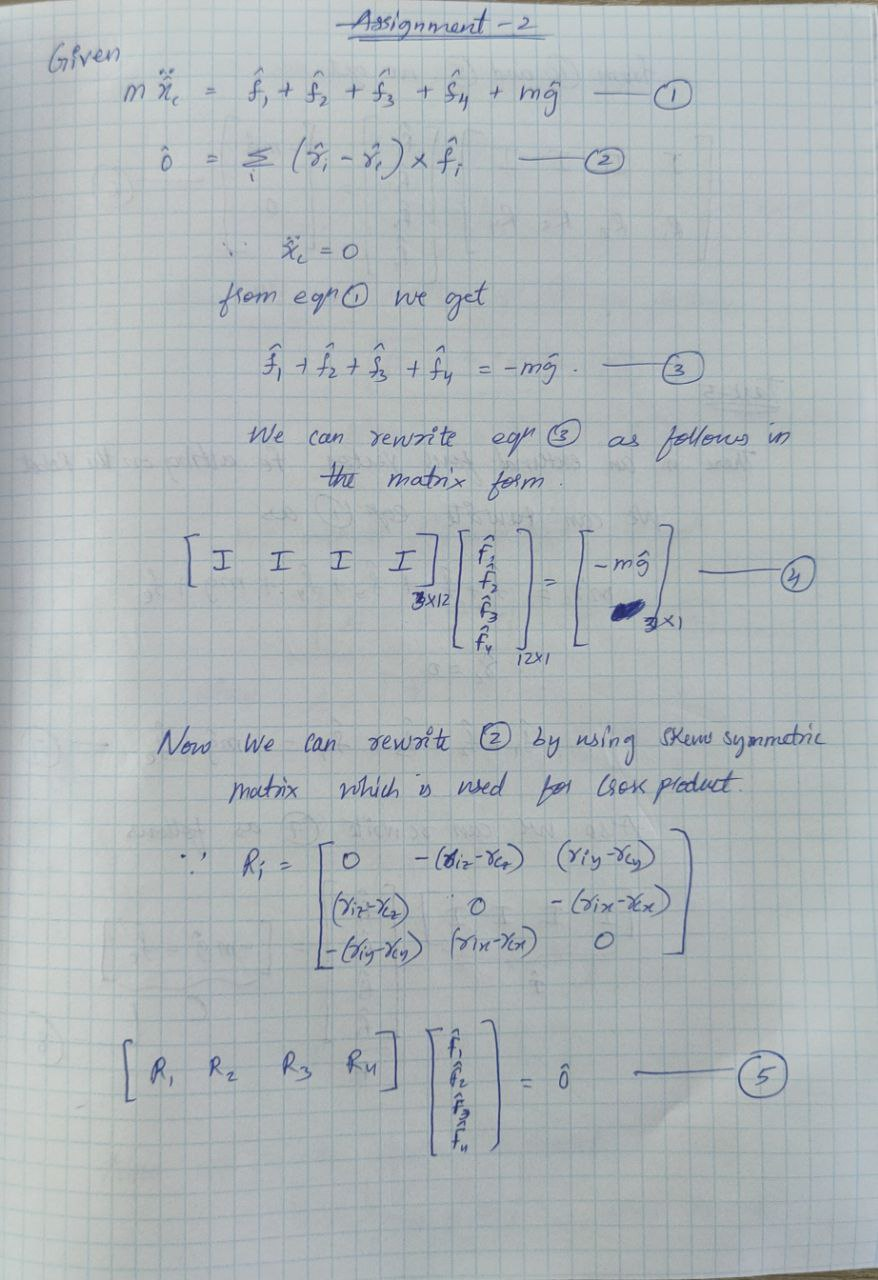

In [75]:
from IPython.display import Image
Image(filename=f'photos/photo_1.jpg')

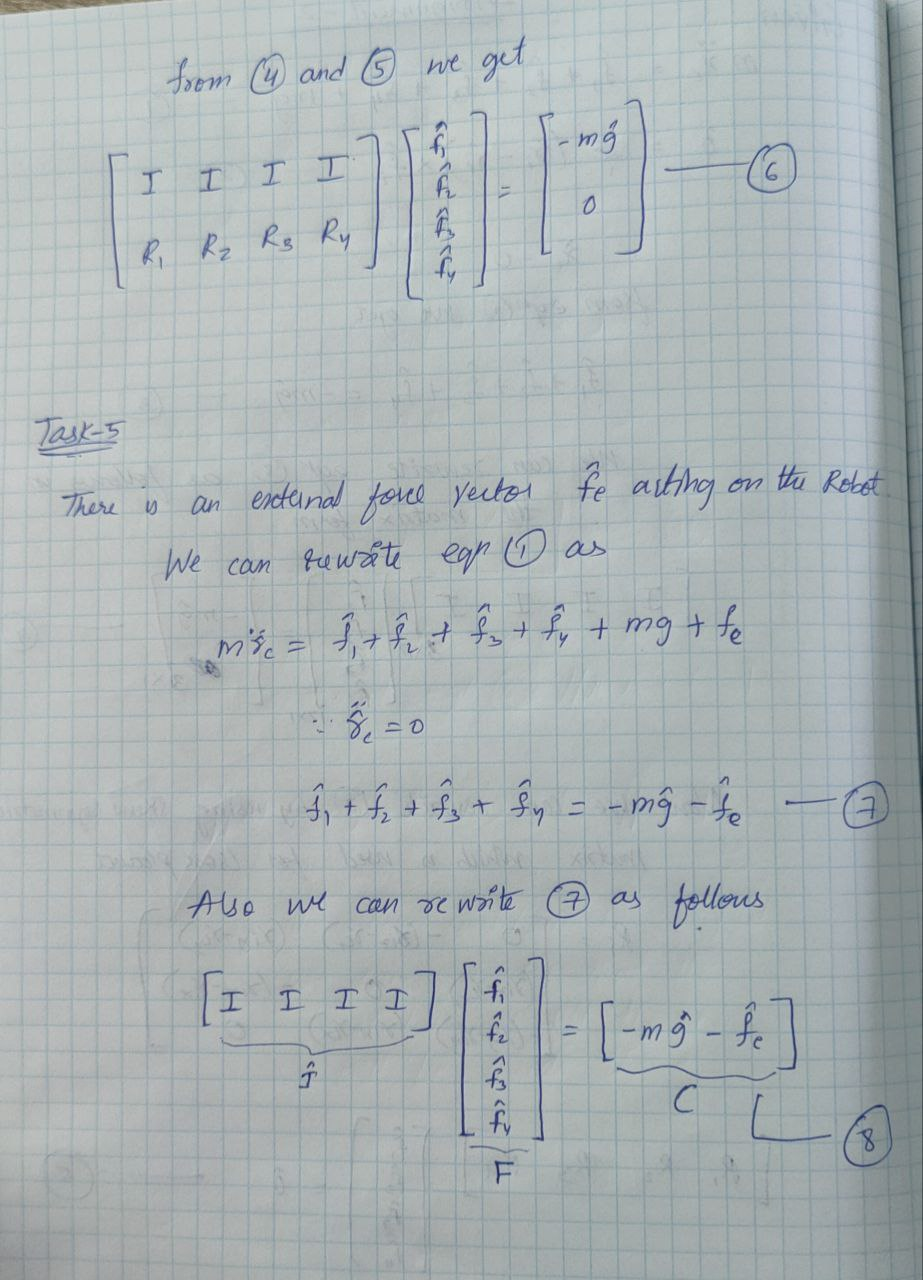

In [76]:
Image(filename=f'photos/photo_2.jpg')

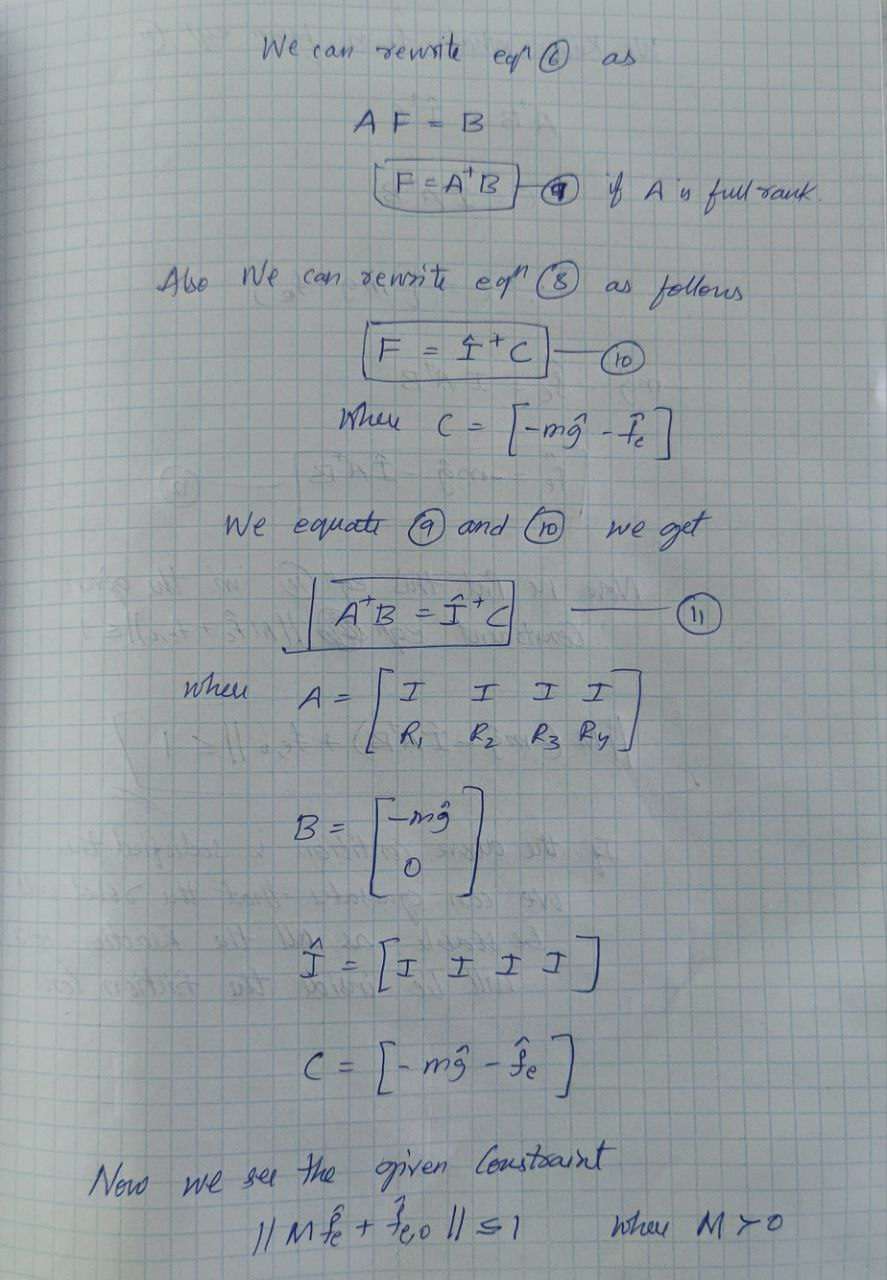

In [77]:
Image(filename=f'photos/photo_3.jpg')

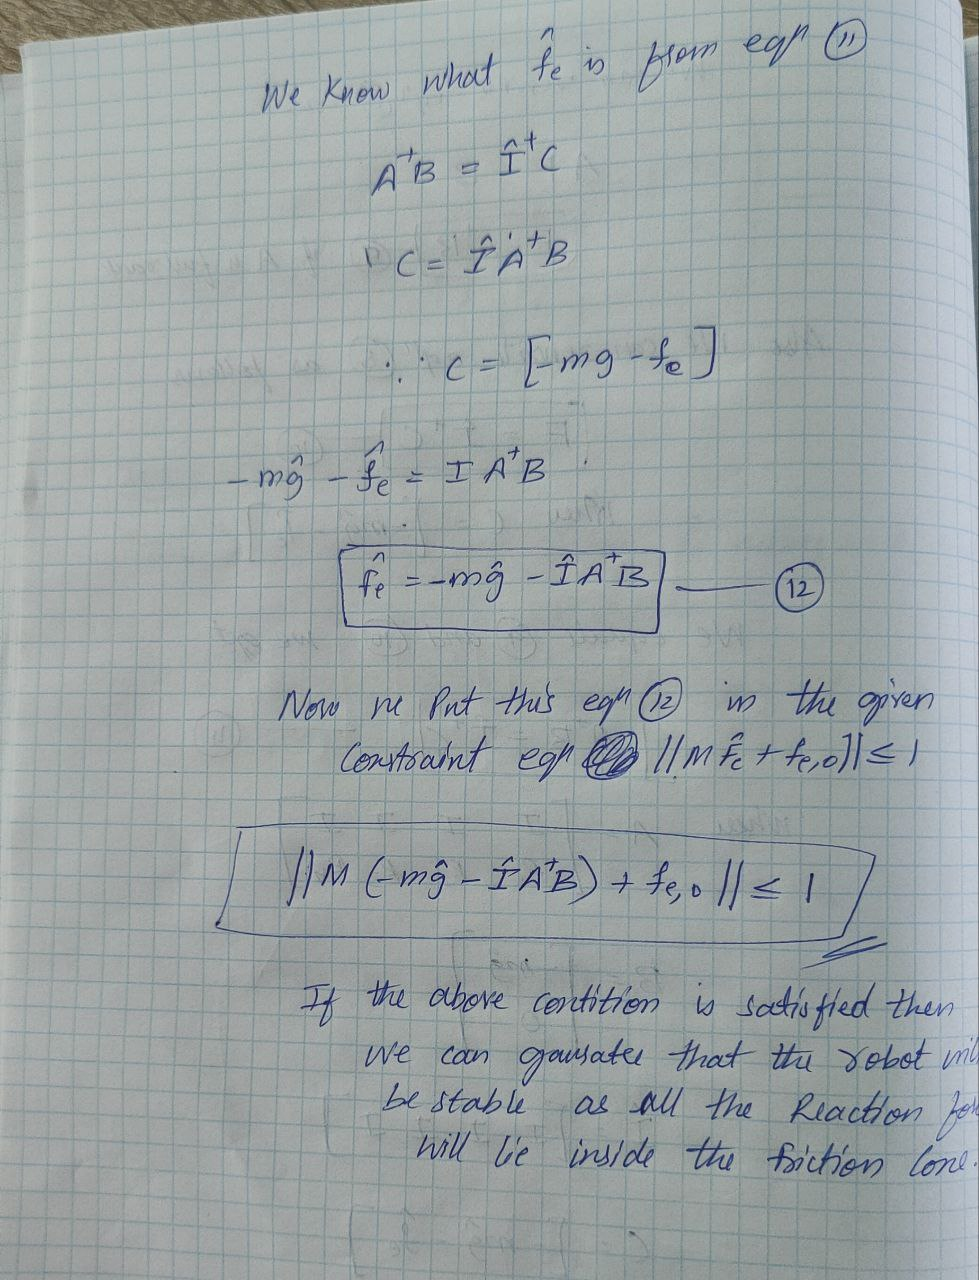

In [78]:
Image(filename=f'photos/photo_4.jpg')